In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)  # displays all columns (wrap-around) in pandas statistics

In [67]:
train = pd.read_csv('data/train.csv')
center = pd.read_csv('data/fulfilment_center_info.csv')
meal = pd.read_csv('data/meal_info.csv')
df_test = pd.read_csv('data/test/test.csv')

##  <font color= darkred> Train Data Inspection</font>🔍📊 

In [68]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


**Train dataset first insights**
* Train dataset contains 8 features
* 456,548 entries per feature
* All datatypes are of type int or float 
* it starts with week 1 and ends with week 145

In [71]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [72]:
train.duplicated().sum()

0

In [73]:
# change `center_id` and `meal_id` to object type because of it's descriptive (categorical) nature
train['center_id'] = train['center_id'].astype('object')
train['meal_id'] = train['meal_id'].astype('object')

In [74]:
train.describe(include = 'all').round(2)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,456548.00,456548.00,456548.0,456548.0,456548.00,456548.00,456548.00,456548.00,456548.00
unique,NaN,NaN,77.0,51.0,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,13.0,2290.0,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,7046.0,11138.0,NaN,NaN,NaN,NaN,NaN
mean,1250096.31,74.77,NaN,NaN,332.24,354.16,0.08,0.11,261.87
std,144354.82,41.52,NaN,NaN,152.94,160.72,0.27,0.31,395.92
min,1000000.00,1.00,NaN,NaN,2.97,55.35,0.00,0.00,13.00
25%,1124998.75,39.00,NaN,NaN,228.95,243.50,0.00,0.00,54.00
50%,1250183.50,76.00,NaN,NaN,296.82,310.46,0.00,0.00,136.00
75%,1375140.25,111.00,NaN,NaN,445.23,458.87,0.00,0.00,324.00


####  <font color= green> Train Data Overview</font>

* The dataset contains information about distribution centers' past order history.
    * The order history is categorized by center, week, and meal_id.

In [75]:
print(f"Number of unique ids in each column: \n{train.nunique()}")
print(f"\n- Number of unique distribution centers: {train['center_id'].nunique()}")
print(f"- Number of unique meal IDs: {train['meal_id'].nunique()}")
print(f"- Number of weeks covered: {train['week'].nunique()}")
print(f"- Checkout price range: ${train['checkout_price'].min()} - ${train['checkout_price'].max()}")
print(f"- Base price range: ${train['base_price'].min()} - ${train['base_price'].max()}")
print(f"- Range in number of orders: {train['num_orders'].min()} - {train['num_orders'].max()}")
print(f"- Least ordered meal: {train['meal_id'][train['num_orders'].idxmin()]} with order count of {train['num_orders'].min()}")
print(f"- Most ordered meal: {train['meal_id'][train['num_orders'].idxmax()]} with order count of {train['num_orders'].max()}")
print(f"- Average order count for the least ordered meal ({train['meal_id'][train['num_orders'].idxmin()]}): {train[train['meal_id'] == train['meal_id'][train['num_orders'].idxmin()]]['num_orders'].mean():.0f}")
print(f"- Average order count for the most ordered meal ({train['meal_id'][train['num_orders'].idxmax()]}): {train[train['meal_id'] == train['meal_id'][train['num_orders'].idxmax()]]['num_orders'].mean():.0f}")
print(f"- Average general order count: {train['num_orders'].mean().round(0)}")

Number of unique ids in each column: 
id                       456548
week                        145
center_id                    77
meal_id                      51
checkout_price             1992
base_price                 1907
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
dtype: int64

- Number of unique distribution centers: 77
- Number of unique meal IDs: 51
- Number of weeks covered: 145
- Checkout price range: $2.97 - $866.27
- Base price range: $55.35 - $866.27
- Range in number of orders: 13 - 24299
- Least ordered meal: 1445 with order count of 13
- Most ordered meal: 2290 with order count of 24299
- Average order count for the least ordered meal (1445): 109
- Average order count for the most ordered meal (2290): 877
- Average general order count: 262.0


* ID has same number of unique values as the number of rows. This implies that each row has a unique ID and it won't be valuable for training.
* Investigate anamoly in `checkout_price` with a min of $2.97 (potential outlier)
* Investigate `num_orders` high max order count of 24,299 orders for a single item one week with average of 877.

In [76]:
print('There is only one entry for a price below $20 with a low number of orders (14)')
train.query('checkout_price < 20.00')

There is only one entry for a price below $20 with a low number of orders (14)


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
110286,1300283,38,73,1230,2.97,316.25,0,0,14


The meal price is usually $316.25, and now it's on sale for $2.97. 

What is this meal 1230? 

In [77]:
meal.query('meal_id == 1230')

,meal_id,category,cuisine
30,1230,Beverages,Continental


In [78]:
train.query('meal_id == 1230 & center_id == 73').sort_values('checkout_price')

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
110286,1300283,38,73,1230,2.97,316.25,0,0,14
304592,1232120,99,73,1230,278.42,277.42,0,0,122
333816,1048113,108,73,1230,282.30,324.98,0,0,176
150442,1433126,51,73,1230,283.24,323.98,1,1,231
314407,1466541,102,73,1230,284.21,324.98,0,1,554
...,...,...,...,...,...,...,...,...,...
451852,1071772,144,73,1230,367.63,369.63,0,0,69
442022,1385193,141,73,1230,367.63,367.63,0,0,68
422321,1413825,135,73,1230,367.63,367.63,0,0,107
399284,1466188,128,73,1230,368.63,367.63,0,0,42


The continental beverage typically sells for $278 - $369 at this specific distribution center, hence we will assume this is a data entry error and adjust the `checkout_price` from $2.97 to $297.00
* We will ensure that this is reasonable by checking the mean checkout price of meal 1230 at center 73

In [79]:
meal_1230 = train.query('meal_id == 1230 & center_id == 73')
meal_1230.groupby('center_id').agg({'checkout_price': 'mean'}).sort_values('checkout_price')

,checkout_price
center_id,
73,317.568806


In [80]:
train.loc[(train['meal_id'] == 1230) & (train['center_id'] == 73) & (train['week'] == 38), 'checkout_price'] = 297.00 # updating the price

#### <font color= green> Graphs and Insights </font>

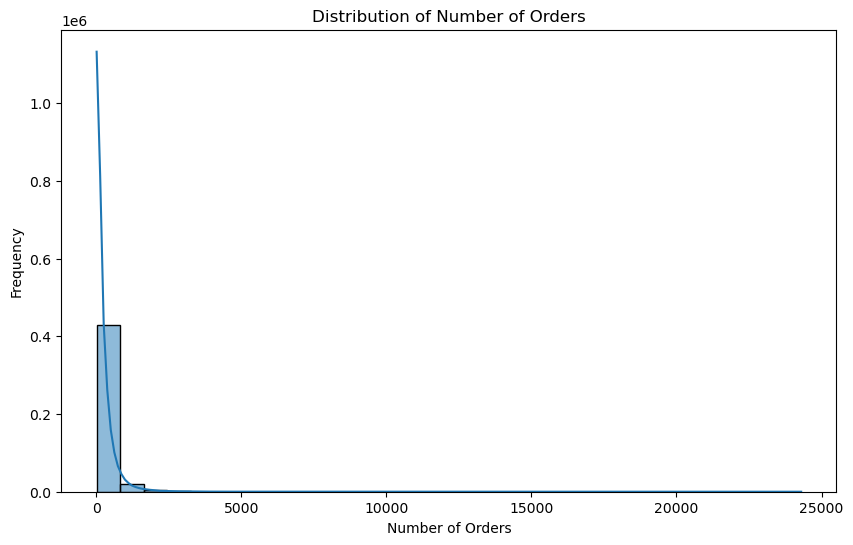

In [81]:
plt.figure(figsize=(10, 6))
sns.histplot(train['num_orders'], bins=30, kde=True)
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Orders')
plt.show()

- The distribution of the number of orders is highly skewed to the right, with most of the order counts being relatively low. The majority of the order counts fall below 324, with only a few instances where the number of orders is significantly higher.

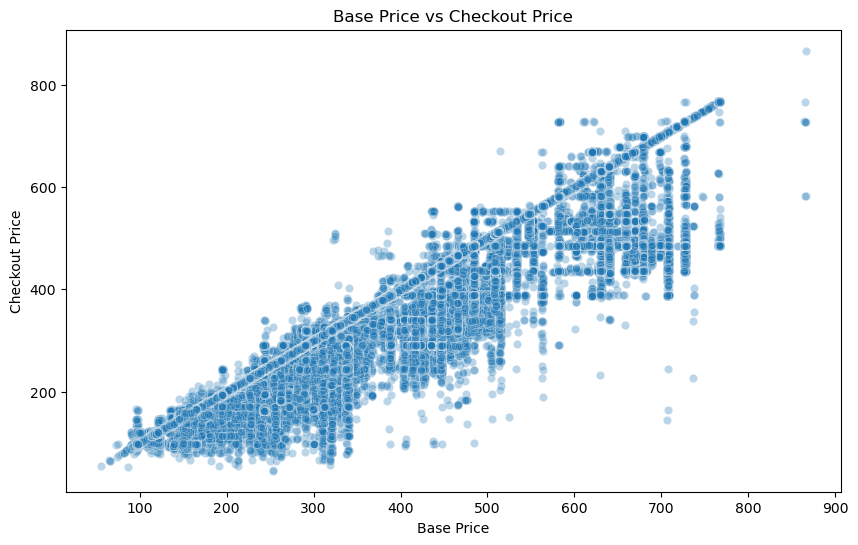

Min Base Price: $55.35, Max Base Price: $866.27
Min Checkout Price: $45.62, Max Checkout Price: $866.27


In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='base_price', y='checkout_price', alpha=0.3)
plt.xlabel('Base Price')
plt.ylabel('Checkout Price')
plt.title('Base Price vs Checkout Price')
plt.show()
print(f"Min Base Price: ${train['base_price'].min()}, Max Base Price: ${train['base_price'].max()}")
print(f"Min Checkout Price: ${train['checkout_price'].min()}, Max Checkout Price: ${train['checkout_price'].max()}")

- There is a strong positive correlation between the base price and the checkout price. The checkout price tends to be close to the base price, with some deviations indicating the effect of promotions.

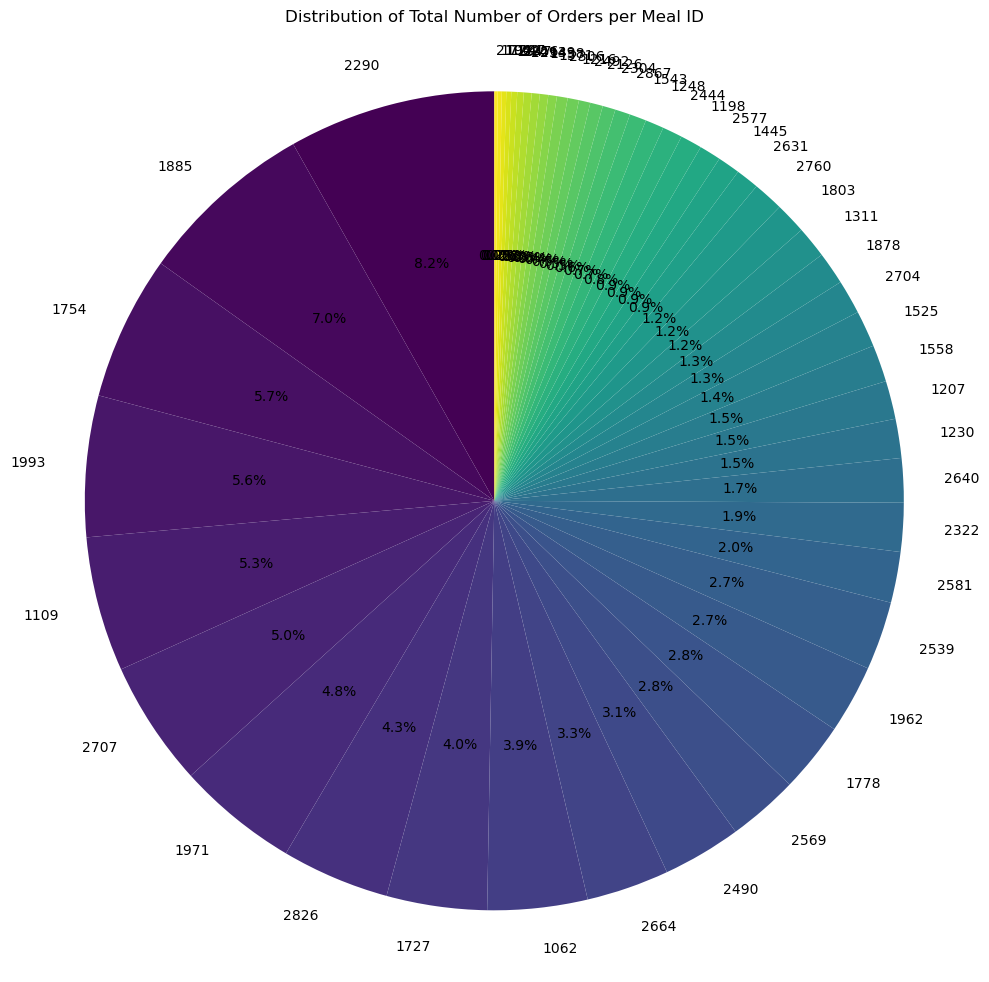

In [72]:
# Group the data by meal_id and sum the num_orders for each meal, then sort it
meal_order_counts = train.groupby('meal_id')['num_orders'].sum().sort_values(ascending=False)
cmap = plt.cm.viridis
colors = cmap(np.linspace(0, 1, len(meal_order_counts)))
plt.figure(figsize=(10, 10))
plt.pie(meal_order_counts, labels=meal_order_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Total Number of Orders per Meal ID')
plt.axis('equal')
plt.tight_layout()
plt.show()

- Meal ID 2290 is the most frequently ordered meal, followed closely by several others. 
- Some meals are significantly more popular than others.

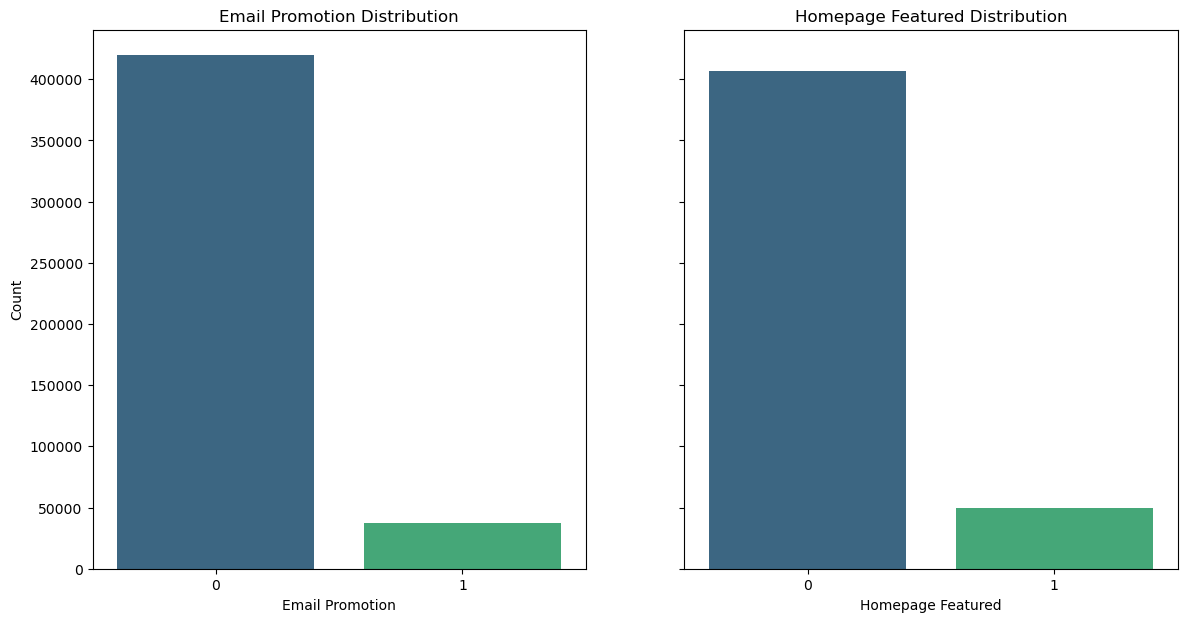

Email Promotion - 0 (no): 419,498, 1 (yes): 37,050
Homepage Featured - 0 (no): 406,693, 1 (yes): 49,855


In [85]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7), sharey=True)
sns.countplot(data=train, x='emailer_for_promotion', palette='viridis', ax=ax[0])
sns.countplot(data=train, x='homepage_featured', palette='viridis', ax=ax[1])
ax[0].set_xlabel('Email Promotion')
ax[0].set_ylabel('Count')
ax[0].set_title('Email Promotion Distribution')
ax[1].set_xlabel('Homepage Featured')
ax[1].set_title('Homepage Featured Distribution')
plt.show()
email_promo_count = train['emailer_for_promotion'].value_counts()
print(f"Email Promotion - 0 (no): {email_promo_count[0]:,}, 1 (yes): {email_promo_count[1]:,}")
homepage_featured_count = train['homepage_featured'].value_counts()
print(f"Homepage Featured - 0 (no): {homepage_featured_count[0]:,}, 1 (yes): {homepage_featured_count[1]:,}")

- Both email promotions and homepage features are infrequent in the dataset. Most records do not utilize these promotional methods.

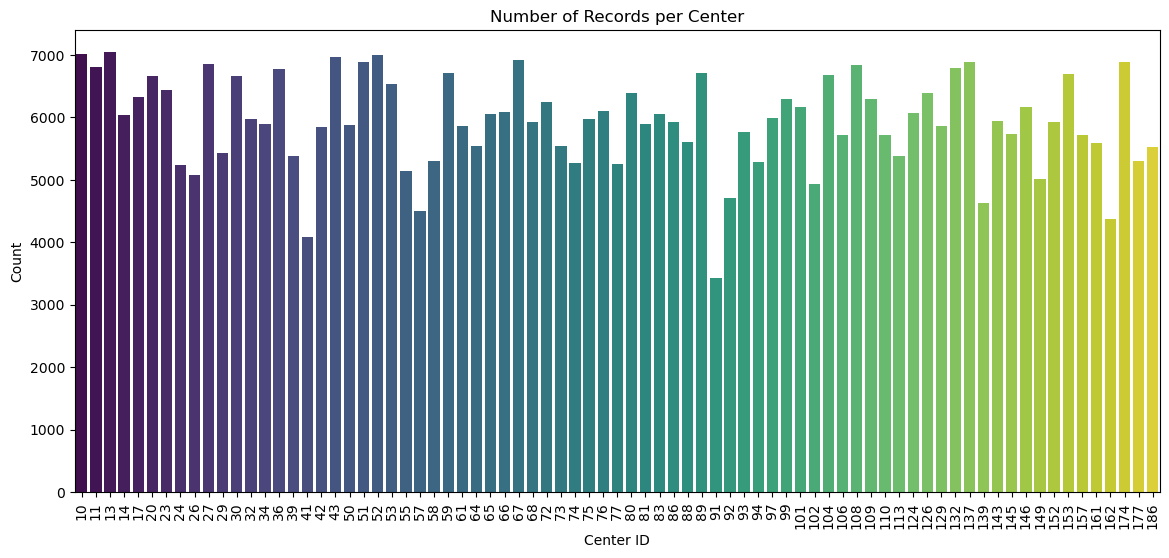

Center with Most Records: Center 13 with 7046 records


In [86]:
plt.figure(figsize=(14, 6))
center_counts = train['center_id'].value_counts()
sns.barplot(x=center_counts.index, y=center_counts.values, palette="viridis")
plt.xlabel('Center ID')
plt.ylabel('Count')
plt.title('Number of Records per Center')
plt.xticks(rotation=90)
plt.show()
most_records_center_id = center_counts.idxmax()
most_records_count = center_counts.max()
print(f"Center with Most Records: Center {most_records_center_id} with {most_records_count} records")

- Center 13 has the highest number of records, but it is not significantly higher than several other centers.

#### <font color= green> Conclusions from train analysis</font>
- The number of orders varies significantly across different centers and weeks, with most orders being relatively low.
- There is a strong positive correlation between base price and checkout price.
- Meal orders are relatively evenly distributed among different meal IDs.
- Email promotions and homepage features are infrequent.
- The distribution of records among centers is relatively even.

##  <font color= darkred> Meal Data Inspection</font>🔍🍴

In [88]:
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [90]:
meal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [91]:
meal.describe(include = 'all')

,meal_id,category,cuisine
count,51.000000,51,51
unique,NaN,14,4
top,NaN,Beverages,Thai
freq,NaN,12,15
mean,2013.921569,NaN,NaN
std,553.633555,NaN,NaN
min,1062.000000,NaN,NaN
25%,1550.500000,NaN,NaN
50%,1971.000000,NaN,NaN
75%,2516.500000,NaN,NaN


####  <font color= green> Meal Data Overview </font>

In [89]:
print("The meal dataset contains information about meal offerings including their categories and cuisines.")
print(f"- Unique meal SKUs {meal['meal_id'].nunique()}")
print(f"- {meal['cuisine'].nunique()} types of cuisines across the meals")
print(f"- Out of {meal['category'].nunique()} meal categories, 'Beverages' has the most offerings with {meal[meal['category'] == 'Beverages'].shape[0]} meals.")

The meal dataset contains information about meal offerings including their categories and cuisines.
- Unique meal SKUs 51
- 4 types of cuisines across the meals
- Out of 14 meal categories, 'Beverages' has the most offerings with 12 meals.


* since meal_id isn't a continuous variable, we will convert it to a categorical variable

In [90]:
# change meal_id to object type 
meal['meal_id'] = meal['meal_id'].astype('object')

#### <font color= green> Graph and Insight Presentation </font>

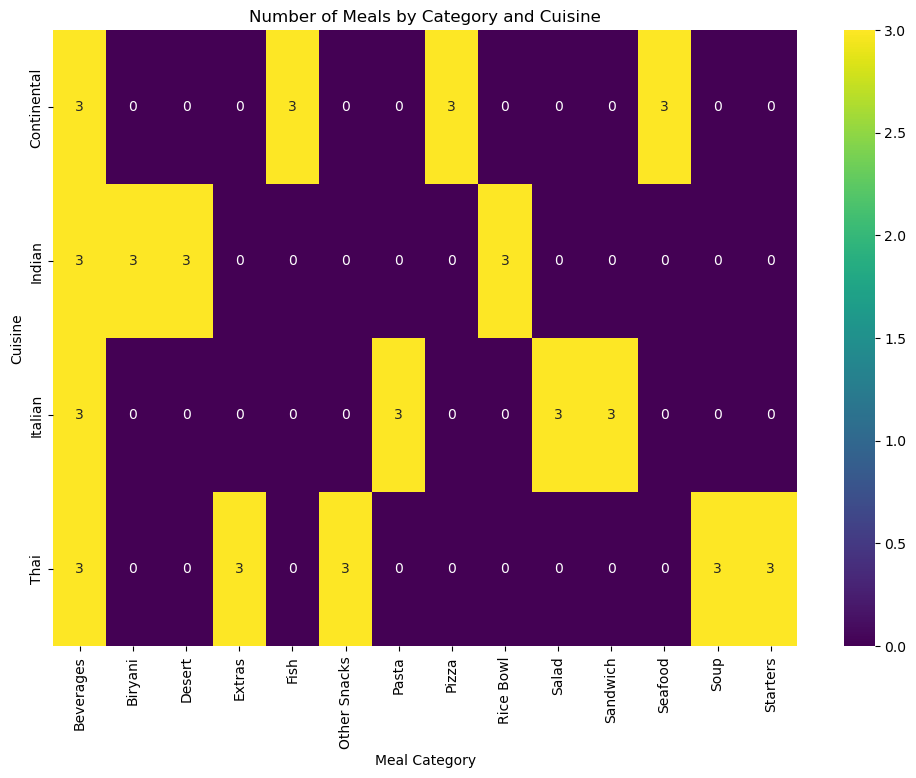

In [116]:
cuisine_category_counts = meal.groupby(['cuisine', 'category']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(cuisine_category_counts, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Meal Category')
plt.ylabel('Cuisine')
plt.title('Number of Meals by Category and Cuisine')
plt.savefig('images/cuisine_category_counts.png', bbox_inches='tight')
plt.show()

**Insights:**
- Each cuisine to has 3 meals offerings per category
- All cuisines offer 3 `Beverages` 
- `Thai` is the only cuisine that has 5 categories, all others have 4 each.

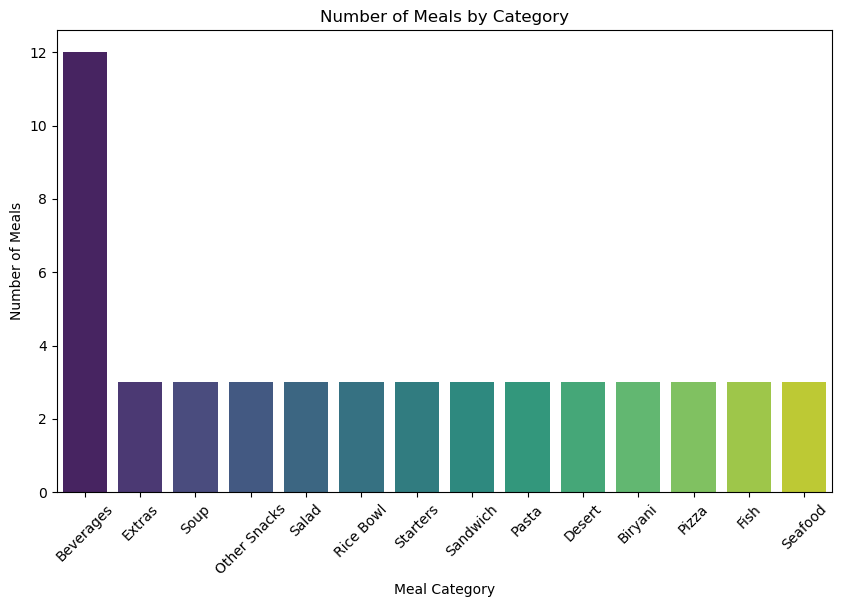

In [93]:
category_counts = meal['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']
plt.figure(figsize=(10, 6))
sns.barplot(data=category_counts, x='category', y='count', palette='viridis')
plt.xlabel('Meal Category')
plt.ylabel('Number of Meals')
plt.title('Number of Meals by Category')
plt.savefig('images/number_of_meals_by_category.png', bbox_inches = 'tight')
plt.xticks(rotation=45)
plt.show()

#### <font color= green> Conclusions from Meal Analysis </font>
Based on the analysis, we can draw the following conclusions:
- There is a strategic focus on beverages, as indicated by the high number and proportion of beverage offerings.
- The meal offerings are balanced across most categories, catering to diverse customer preferences.
- While Thai cuisine leads slightly, the representation of other cuisines is uniform, showing a strategy to cater to varied tastes and preferences.

###  <font color= darkred> Fulfillment Center Data Inspection</font>🔍🏢

In [102]:
center_sorted = center.sort_values(by='center_id')
center_sorted.head(10)

,center_id,city_code,region_code,center_type,op_area
56,10,590,56,TYPE_B,6.3
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
17,14,654,56,TYPE_C,2.7
69,17,517,56,TYPE_A,3.2
31,20,522,56,TYPE_A,4.0
21,23,698,23,TYPE_A,3.4
64,24,614,85,TYPE_B,3.6
18,26,515,77,TYPE_C,3.0
16,27,713,85,TYPE_A,4.5


In [103]:
center.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [104]:
# convert center_id, region_code and city_code to object type in order to generate insights, Operational Area is the only value that has numerical significance
center['center_id'] = center['center_id'].astype('object')
center['region_code'] = center['region_code'].astype('object')
center['city_code'] = center['city_code'].astype('object')

In [105]:
center.describe(include='all')

,center_id,city_code,region_code,center_type,op_area
count,77.0,77.0,77.0,77,77.000000
unique,77.0,51.0,8.0,3,NaN
top,11.0,590.0,56.0,TYPE_A,NaN
freq,1.0,9.0,30.0,43,NaN
mean,NaN,NaN,NaN,NaN,3.985714
std,NaN,NaN,NaN,NaN,1.106406
min,NaN,NaN,NaN,NaN,0.900000
25%,NaN,NaN,NaN,NaN,3.500000
50%,NaN,NaN,NaN,NaN,3.900000
75%,NaN,NaN,NaN,NaN,4.400000


In [117]:
print("The dataset contains information about distribution centers including their types, locations, and operational areas.")
print(f"- {center['center_id'].nunique()} distribution centers.")
print(f"- {center['center_type'].nunique()} distribution center types, the most prevalent being 'TYPE_A' with {center[center['center_type'] == 'TYPE_A'].shape[0]} centers.")
print(f"- The centers are located in {center['region_code'].nunique()} different regions, across {center['city_code'].nunique()} cities.")
print(f"- Each center has an operational area, with the lowest being {center['op_area'].min()} km^2 and the highest being {center['op_area'].max()} km^2.")

The dataset contains information about distribution centers including their types, locations, and operational areas.
- 77 distribution centers.
- 3 distribution center types, the most prevalent being 'TYPE_A' with 43 centers.
- The centers are located in 8 different regions, across 51 cities.
- Each center has an operational area, with the lowest being 0.9 km^2 and the highest being 7.0 km^2.


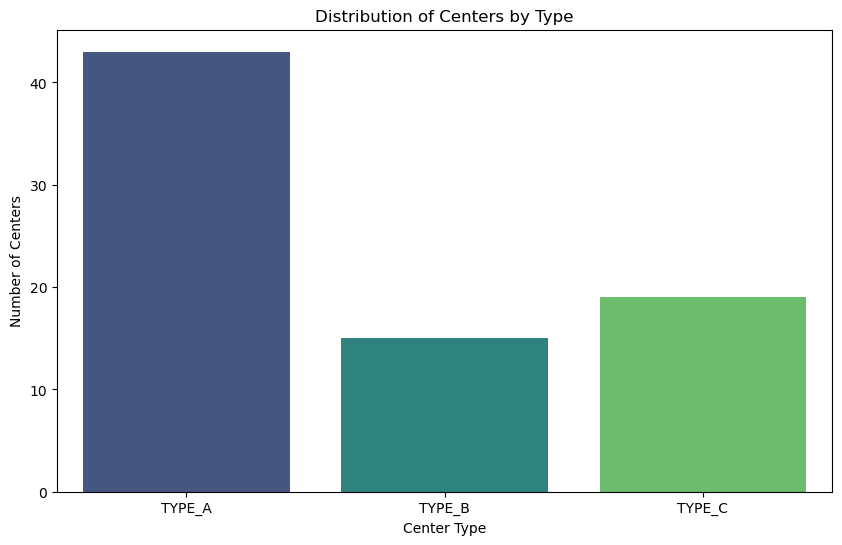

In [108]:
plt.figure(figsize=(10, 6))
sns.countplot(data=center, x='center_type', palette='viridis')
plt.xlabel('Center Type')
plt.ylabel('Number of Centers')
plt.title('Distribution of Centers by Type')
plt.savefig('images/center_type_counts.png', bbox_inches='tight')
plt.show()

**Insights:**
- `TYPE_A` is the most prevalent center type, with 43 centers out of the total 77, indicating that it plays a crucial role in the distribution network.

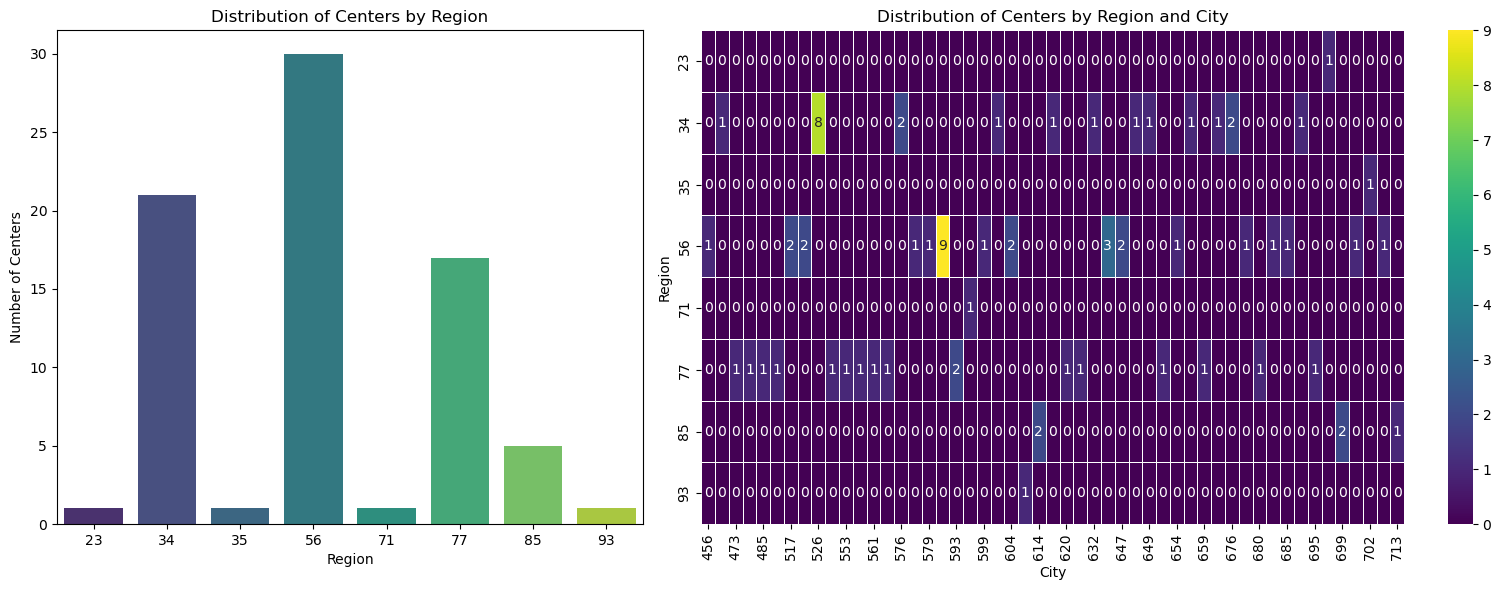

In [112]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [2, 3]})
plt.subplot(1, 2, 1)
sns.countplot(data=center, x='region_code', palette='viridis')
plt.xlabel('Region')
plt.ylabel('Number of Centers')
plt.title('Distribution of Centers by Region')

plt.subplot(1, 2, 2)
region_city_counts = center.groupby(['region_code', 'city_code']).size().unstack(fill_value=0)
sns.heatmap(region_city_counts, cmap="viridis", linewidths=.5,  annot = True)
plt.xlabel('City')
plt.ylabel('Region')
plt.title('Distribution of Centers by Region and City')

plt.tight_layout()
plt.savefig('images/region_city_counts.png', bbox_inches='tight')
plt.show()

**Insights:**
- Region 56 has the highest number of centers, making it a major hub, followed by region 34. 
- The heatmap also shows these regions as having the highest concentration of centers with 9 and 8 for cities within their area.

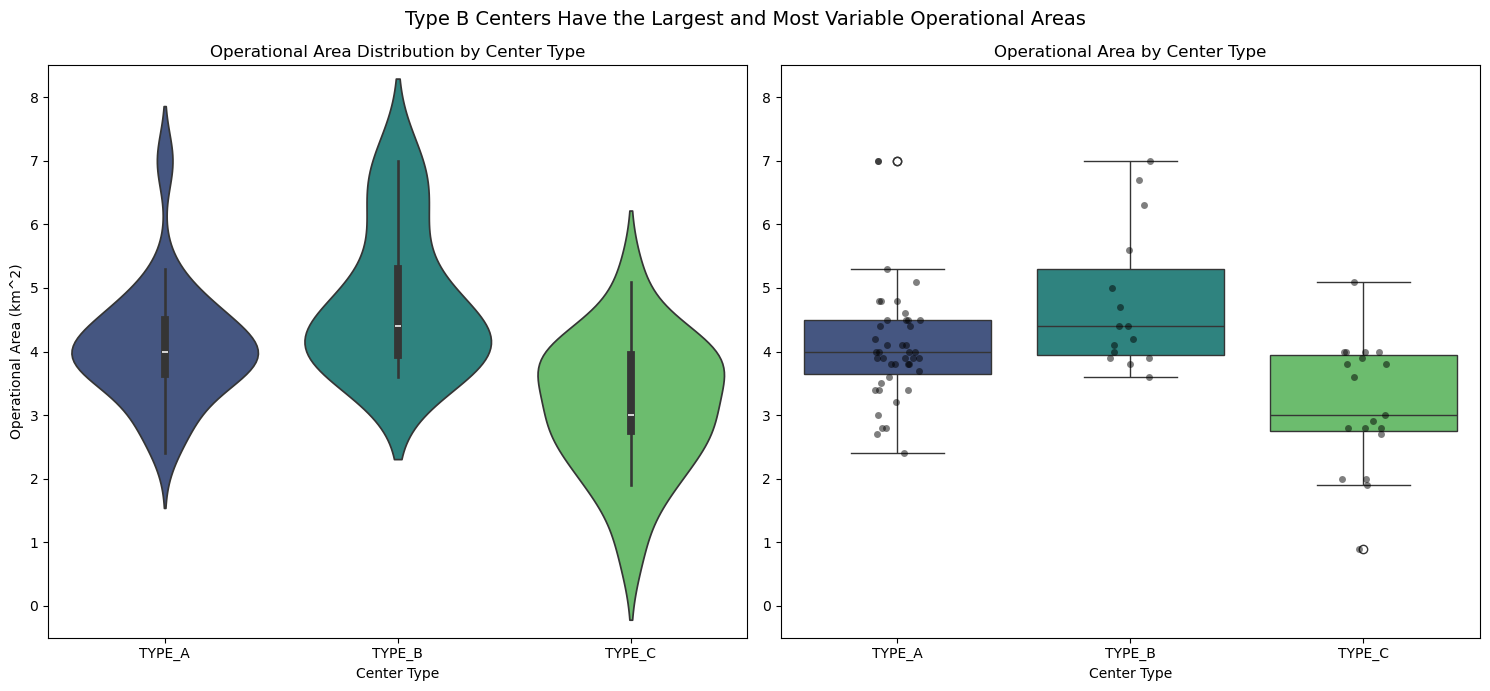

In [114]:
plt.figure(figsize=(15, 7))
plt.suptitle('Type B Centers Have the Largest and Most Variable Operational Areas', fontsize=14)

plt.subplot(1, 2, 1)
sns.violinplot(data=center, x='center_type', y='op_area', palette='viridis')
plt.xlabel('Center Type')
plt.ylabel('Operational Area (km^2)')
plt.title('Operational Area Distribution by Center Type')
plt.ylim(-0.5, 8.5)  # Set the y-axis limit

plt.subplot(1, 2, 2)
sns.boxplot(data=center, x='center_type', y='op_area', palette='viridis')
sns.stripplot(data=center, x='center_type', y='op_area', color='black', alpha=0.5, jitter=True)
plt.xlabel('Center Type')
plt.ylabel('')
plt.title('Operational Area by Center Type')
plt.ylim(-0.5, 8.5)  # Set the y-axis limit

plt.savefig('images/operational_area_by_center_type.png', bbox_inches='tight')
plt.tight_layout()
plt.show()

**Insights:**
- The violin plot shows that 'TYPE_B' centers generally have larger operational areas compared to `TYPE_A` and `TYPE_C`. This indicates that `TYPE_B` centers might be handling larger volumes or have more extensive operations.
- The box plot with jitter points provides a clear view of the spread and median operational areas for each center type, with `TYPE_B` showing more variability in operational area size.
- From earlier plots, we know that there are most centers of `TYPE_A`.

#### <font color = green> Conclusions from Fulfillment Center Analysis </font>
Based on the analysis of the distribution center data, we can draw the following conclusions:
- 'TYPE_A' centers are the most prevalent and may have a significant impact on overall operations.
- The distribution of centers across regions can influence regional demand and capacity planning.
- The operational area distribution provides insights into the capacity and scalability of different centers.
- Understanding the geographical distribution helps in strategic planning for logistics and resource allocation.
- Correlation analysis highlights key relationships between operational area, center type, and region, which can inform further predictive modeling.

##  <font color= darkred> Merge Datasets </font>

In [118]:
train_df = train.merge(meal, on='meal_id', how='left')
train_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian


In [119]:
train_df = train_df.merge(center, on='center_id', how='left')
train_df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0


In [120]:
print('Merged dataset shape:', train_df.shape, '\nOriginal Train shape:', train.shape)
train_df.to_csv(r'C:\Users\M\Desktop\food-demand-forecasting-main\food-demand-forecasting-main\data\train_df.csv', index = False)
train_df.head()

Merged dataset shape: (456548, 15) 
Original Train shape: (456548, 9)


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0


In [121]:
df = train_df.copy()

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  object 
 3   meal_id                456548 non-null  object 
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  object 
 12  region_code            456548 non-null  object 
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [123]:
df.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area'],
      dtype='object')

In [124]:
new_names = ['id', 'week', 'center', 'meal', 'checkout_price', 'base_price',
       'email_promo', 'homepage_featured', 'num_orders', 'meal_category',
       'cuisine', 'city', 'region', 'center_type', 'op_area']

In [125]:
df.columns = new_names # replace the existing names with new names
df.columns

Index(['id', 'week', 'center', 'meal', 'checkout_price', 'base_price',
       'email_promo', 'homepage_featured', 'num_orders', 'meal_category',
       'cuisine', 'city', 'region', 'center_type', 'op_area'],
      dtype='object')

In [126]:
df.describe(include='all')

,id,week,center,meal,checkout_price,base_price,email_promo,homepage_featured,num_orders,meal_category,cuisine,city,region,center_type,op_area
count,4.565480e+05,456548.000000,456548.0,456548.0,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548,456548,456548.0,456548.0,456548,456548.000000
unique,NaN,NaN,77.0,51.0,NaN,NaN,NaN,NaN,NaN,14,4,51.0,8.0,3,NaN
top,NaN,NaN,13.0,2290.0,NaN,NaN,NaN,NaN,NaN,Beverages,Italian,590.0,56.0,TYPE_A,NaN
freq,NaN,NaN,7046.0,11138.0,NaN,NaN,NaN,NaN,NaN,127890,122925,54746.0,191228.0,262881,NaN
mean,1.250096e+06,74.768771,NaN,NaN,332.239577,354.156627,0.081152,0.10920,261.872760,NaN,NaN,NaN,NaN,NaN,4.083590
std,1.443548e+05,41.524956,NaN,NaN,152.938956,160.715914,0.273069,0.31189,395.922798,NaN,NaN,NaN,NaN,NaN,1.091686
min,1.000000e+06,1.000000,NaN,NaN,45.620000,55.350000,0.000000,0.00000,13.000000,NaN,NaN,NaN,NaN,NaN,0.900000
25%,1.124999e+06,39.000000,NaN,NaN,228.950000,243.500000,0.000000,0.00000,54.000000,NaN,NaN,NaN,NaN,NaN,3.600000
50%,1.250184e+06,76.000000,NaN,NaN,296.820000,310.460000,0.000000,0.00000,136.000000,NaN,NaN,NaN,NaN,NaN,4.000000
75%,1.375140e+06,111.000000,NaN,NaN,445.230000,458.870000,0.000000,0.00000,324.000000,NaN,NaN,NaN,NaN,NaN,4.500000
